# Introduzione all'Intelligenza Artificiale
## Supporto per le esercitazioni

Questo notebook rappresenta una guida all'implementazione e utilizzo dei principali algoritmi e modelli presentati nell'ambito del corso "Introduzione all'Intelligenza Artificiale", corso di Laurea in Informatica, Università di Pisa, anno accademico 2024/2025.

Il codice presentato di seguito è un'implementazione delle funzioni riportate nel testo di riferimento del corso:<br/>
*S. Russell, P. Norvig, "Artificial Intelligence: A Modern Approach, Pearson, 4th Edition, 2020*

Ulteriori risorse possono essere reperite online all'indirizzo: https://github.com/aimacode

Questo notebook contiene degli esempi di utilizzo degli algoritmi di ricerca implementati in $\texttt{search.py}$.<br/>
Di seguito, l'implementazione di alcuni problemi di esempi e l'esecuzione degli algoritmi.

## Problemi di esempio
Per rappresentare un'istanza di un problema concreto, occorre specializzare la classe $\texttt{Problem}$ implementata in $\texttt{utils.py}$.<br/>
È necessario almeno implementare le funzioni $\texttt{actions()}$ e $\texttt{result()}$.

In [15]:
!git clone https://github.com/luigiquara/IIA-python.git
%cd IIA-python/src
from utils import Problem

fatal: destination path 'IIA-python' already exists and is not an empty directory.
/content/IIA-python/src/IIA-python/src


### **ToyProblem1**
Un semplice esempio di problema è definito nella classe $\texttt{ToyProblem1}$.<br/>
La figura indica la mappa degli stati che il problema implementa.
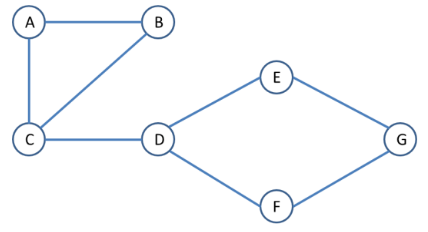

In [16]:
class ToyProblem1(Problem):
    # utilizza il costruttore di default della classe Problem

    # per ogni stato, restituisce l'insieme delle possibili azioni
    def actions(self, state):
        if state == 'A':
            possible_actions = ['A->B', 'A->C']
        elif state == 'B':
            possible_actions = ['B->A', 'B->C']
        elif state == 'C':
            possible_actions = ['C->B', 'C->D']
        elif state == 'D':
            possible_actions = ['D->E', 'D->F']
        elif state == 'E':
            possible_actions = ['E->D', 'E->G']
        elif state == 'F':
            possible_actions = ['F->D', 'F->G']
        elif state == 'G':
            possible_actions = ['G->E', 'G->F']

        else: # caso di default
            possible_actions = []

        return possible_actions

    # Dati uno stato e un'azione, restituisce lo stato risultante
    def result(self, state, action):
        # in questo caso, il nuovo stato è semplicemente l'ultimo carattere
        # della stringa che rappresenta l'azione
        new_state = action[-1:]
        return new_state

### **ToyProblem2**
Questo esempio specializza la classe $\texttt{ToyProblem1}$:, reimplementando la funzione $\texttt{action_cost()}$ per modificare il costo di alcuni cammini.

In [17]:
class ToyProblem2(ToyProblem1):
    # utilizza il costruttore di default della classe Problem
    # e le funzioni actions e result definite dalla classe ToyProblem1

    def action_cost(self, action, stateA, stateB):
        if action == 'A->C': return 3
        elif action == 'E->G': return 2
        else: return 1

### **Viaggio in Romania**

La classe $\texttt{RomaniaProblem}$ implementa il problema di ricerca relativo alla mappa della Romania (AIMA - Fig. 3.1)

In [18]:
class RomaniaProblem(Problem):

    # posizioni delle città sulla mappa
    # necessarie per il calcolo della funzione euristica
    posizione = {'Arad':[91, 492], 'Bucharest':[400, 327], 'Craiova':[253, 288],
                 'Drobeta':[165, 299], 'Eforie':[562, 293],'Fagaras':[305, 449],
                 'Giurgiu':[375, 270], 'Hirsova':[534, 350],'Iasi':[473, 506],
                 'Lugoj':[165, 379], 'Mehadia':[168, 339], 'Neamt':[406, 537],
                 'Oradea':[131, 571], 'Pitesti':[320, 368], 'Rimnicu':[233, 410],
                 'Sibiu':[207, 457], 'Timisoara':[94, 410], 'Urziceni':[456, 350],
                 'Vaslui':[509, 444], 'Zerind':[108, 531]}

    # per ogni stato, restituisce l'insieme delle azioni possibili
    def actions(self, state):
        if state == 'Arad':
            possible_actions = ['Arad->Zerind','Arad->Sibiu','Arad->Timisoara']
        elif state == 'Bucharest':
            possible_actions = ['Bucharest->Urziceni','Bucharest->Pitesti','Bucharest->Giurgiu','Bucharest->Fagaras']
        elif state == 'Craiova':
            possible_actions = ['Craiova->Drobeta', 'Craiova->Rimnicu','Craiova->Pitesti']
        elif state == 'Drobeta':
            possible_actions = ['Drobeta->Mehadia','Drobeta->Craiova']
        elif state == 'Eforie':
            possible_actions = ['Eforie->Hirsova']
        elif state == 'Fagaras':
            possible_actions = ['Fagaras->Bucharest','Faragas->Sibiu']
        elif state == 'Hirsova':
            possible_actions = ['Hirsova->Urziceni','Hirsova->Eforie']
        elif state == 'Iasi':
            possible_actions = ['Iasi->Vaslui','Iasi->Neamt']
        elif state == 'Lugoj':
            possible_actions =['Lugoj->Timisoara','Lugoj->Mehadia']
        elif state == 'Oradea':
            possible_actions = ['Oradea->Zerind', 'Oradea->Sibiu']
        elif state == 'Pitesti':
            possible_actions = ['Pitesti->Rimnicu','Pitesti->Craiova','Pitesti->Bucharest']
        elif state == 'Rimnicu':
            possible_actions = ['Rimnicu->Sibiu','Rimnicu->Craiova','Rimnicu->Pitesti']
        elif state == 'Urziceni':
            possible_actions = ['Urziceni->Vaslui','Urziceni->Bucharest','Urziceni->Hirsova']
        elif state == 'Zerind':
            possible_actions = ['Zerind->Arad','Zerind->Oradea']
        elif state == 'Sibiu':
            possible_actions = ['Sibiu->Fagaras','Sibiu->Rimnicu','Sibiu->Arad','Sibiu->Oradea']
        elif state == 'Timisoara':
            possible_actions = ['Timisoara->Arad','Timisoara->Lugoj']
        elif state == 'Giurgiu':
            possible_actions = ['Giurgiu->Bucharest']
        elif state == 'Mehadia':
            possible_actions = ['Mehadia->Drobeta','Mehadia->Lugoj']
        elif state == 'Vaslui':
            possible_actions = ['Vaslui->Iasi','Vaslui->Urziceni']
        elif state == 'Neamt':
            possible_actions = ['Neamt->Iasi']
        else:
            possible_actions = []
        return possible_actions

    # Dati uno stato e un'azione, restituisce lo stato risultante
    def result(self, state, action):
        # In questo caso, restituisce la seconda parte della stringa che definisce l'azio
        # cioe' la sottostringa da '>' in poi

        new_state = action[action.index('>')+1:]
        return new_state

    # Restituisce il costo di ogni possibile azione
    # In questo caso, il costo è associato alla distanza tra le città
    def action_cost(self, action, stateA, stateB):
        if action == 'Arad->Zerind' or  action == 'Zerind->Arad':
            return 75
        elif action == 'Arad->Sibiu' or action == 'Sibiu->Arad':
            return 140
        elif action == 'Arad->Timisoara' or action == 'Timisoara->Arad':
            return 118
        elif action == 'Bucharest->Urziceni' or action == 'Urziceni->Bucharest':
            return 85
        elif action == 'Bucharest->Pitesti' or action == 'Pitesti->Bucharest':
            return 101
        elif action == 'Bucharest->Giurgiu'or action == 'Giurgiu->Bucharest':
            return 90
        elif action == 'Bucharest->Fagaras' or action == 'Fagaras->Bucharest':
            return 211
        elif action == 'Craiova->Drobeta' or action == 'Drobeta->Craiova':
            return 120
        elif action ==  'Craiova->Rimnicu' or action == 'Rimnicu->Craiova':
            return 146
        elif action == 'Craiova->Pitesti' or action == 'Pitesti->Craiova':
            return 138
        elif action == 'Drobeta->Mehadia' or action == 'Mehadia->Drobeta':
            return 75
        elif action == 'Eforie->Hirsova' or action == 'Hirsova->Eforie':
            return 86
        elif action == 'Fagaras->Sibiu' or action == 'Sibiu->Fagaras':
            return 99
        elif action == 'Hirsova->Urziceni' or action == 'Urziceni->Hirsova':
            return 98
        elif action == 'Iasi->Vaslui' or action == 'Vaslui->Iasi':
            return 92
        elif action == 'Iasi->Neamt' or action == 'Neamt->Iasi':
            return 87
        elif action == 'Lugoj->Timisoara' or action == 'Timisoara->Lugoj':
            return 111
        elif action == 'Lugoj->Mehadia' or action == 'Mehadia->Lugoj':
            return 70
        elif action == 'Oradea->Zerind' or action == 'Zerind->Oradea':
            return 71
        elif action == 'Oradea->Sibiu' or action == 'Sibiu->Oradea':
            return 151
        elif action == 'Pitesti->Rimnicu' or action == 'Rimnicu->Pitesti':
            return 97
        elif action == 'Rimnicu->Sibiu' or action == 'Sibiu->Rimnicu':
            return 80
        elif action == 'Urziceni->Vaslui' or action == 'Vaslui->Urziceni':
            return 142
        else:
            return 0

        # Restituisce la distanza euclidea tra due punti su un piano
        # Necessaria per il calcolo della funzione euristica
        def distanza_euclidea(self, pos1, pos2):
            return ((pos1[0] - pos2[0])**2 + (pos1[1] - pos2[1])**2)**0.5

        # Restituisce la stima del costo per andare da node.state allo stato obiettivo.
        # In questo caso, la stima è la distanza delle due città in linea d'aria
        def h(self, node):
            citta1 = node.state
            citta2 = self.goal_state

            return self.distanza_euclidea(self.posizione[citta1], self.posizione[citta2])

### **Labirinto di Teseo**

In [19]:
class Labirinto_Teseo(Problem):

    # Definizione di un costruttore custom
    # Oltre allo stato iniziale e l'obiettivo, vengono definite le possibili azioni
    # È possibile indicare l'ordine con il quale vengono prese in considerazione le azioni
    def __init__(self, initial_state='(2,1)', goal_state='(2,4)', possible_actions=['UP', 'DOWN', 'LEFT', 'RIGHT']):
        self.initial_state = initial_state
        self.goal_state = goal_state
        self.possible_actions = possible_actions

    # per ogni casella, restituisce l'insieme delle possibili azioni
    # in base alla conformazione del labirinto
    def actions(self, state):
        # initializza la lista delle possibili azioni
        # e rimuove le azioni che non possono essere eseguite
        possible_actions = self.possible_actions[:]

        if (state == '(2,1)') or (state == '(3,2)') or (state == '(1,2)') or (state == '(1,3)') \
            or (state == '(4,1)') or (state == '(4,2)') or (state == '(4,3)') or (state == '(4,4)'):
            possible_actions.remove('DOWN')

        if (state == '(3,1)') or (state == '(2,2)') or (state == '(2,3)') or (state == '(4,2)') \
           or (state == '(1,1)') or (state == '(1,2)') or (state == '(1,3)') or (state == '(1,4)'):
            possible_actions.remove('UP')

        if (state == '(3,2)') or (state == '(2,3)') or (state == '(3,3)') or \
        (state == '(1,4)') or (state == '(2,4)') or (state == '(3,4)') or (state == '(4,4)'):
            possible_actions.remove('RIGHT')

        if (state == '(4,2)') or (state == '(3,4)') or (state == '(3,3)') or \
        (state == '(1,1)') or (state == '(2,1)') or (state == '(3,1)') or (state == '(4,1)'):
            possible_actions.remove('LEFT')
        return possible_actions

    # Restituisce lo stato che si ottiene una volta eseguita l'azione indicata
    # mentre si è nella casella 'state'
    def result(self, state, action):

        # ottiene le coordinate RIGA - COLONNA corrispondenti a state
        row = int(state[1:2])
        col = int(state[-2:-1])

        if action == 'UP':
            row = row - 1
        elif action == 'DOWN':
            row = row + 1
        elif action == 'RIGHT':
            col = col + 1
        elif action == 'LEFT':
            col = col - 1

        # costruisci la nuova stringa di stato e restituiscila
        new_state = '('+str(row)+','+str(col)+')'
        return new_state

    # Funzione euristica
    # Restituisce l'opposto della profondità del nodo
    # Viene sottratto il costo del cammino, affinchè f = g + h sia uguale a -node.depth
    def h(self, node):
        return -node.depth - node.path_cost

È possibile definire delle versioni alternative del problema del Labirinto di Teseo, utilizzando funzioni euristiche differenti.<br/>
Di seguito, due esempi altre possibili euristiche.

In [20]:
class Labirinto_Teseo_F(Labirinto_Teseo):
    def h(self,node):
        # l'euristica in questo caso e' data da:
        # |row - row_goal| + |col - col_goal|

        # calcola row e col dello stato corrispondente al nodo
        row = int(node.state[1:2])
        col = int(node.state[-2:-1])
        # calcola row e col dello stato goal
        row_goal = int(self.goal_state[1:2])
        col_goal = int(self.goal_state[-2:-1])

        return abs(row-row_goal) + abs(col-col_goal)

In [21]:
class Labirinto_Teseo_H(Labirinto_Teseo):

    def h(self,node):
        # l'euristica in questo caso e' data da:
        # |row - row_goal| + |col - col_goal|
        # siccome vogliamo che f = h, sottraiamo il valore di g

        # calcola row e col dello stato corrispondente al nodo
        row = int(node.state[1:2])
        col = int(node.state[-2:-1])
        # calcola row e col dello stato goal
        row_goal = int(self.goal_state[1:2])
        col_goal = int(self.goal_state[-2:-1])

        return abs(row-row_goal) + abs(col-col_goal) - node.path_cost

## Esecuzione di algoritmi di ricerca

In [25]:
from search import breadth_first_search, depth_first_search, depth_first_recursive_search,\
depth_limited_search, depth_recursive_limited_search, uniform_cost_search, astar_search

Prima dell'esecuzione degli algoritmi, vengono create le istanze dei problemi.

In [41]:
# vengono usati i parametri di default, con le possibili azioni ['UP', 'DOWN', 'LEFT', 'RIGHT']
teseo = Labirinto_Teseo()

# è possibile definire un ordine diverso delle possibili azioni
teseo1 = Labirinto_Teseo(possible_actions=['UP','RIGHT','DOWN','LEFT'])
teseo2 = Labirinto_Teseo(possible_actions=['LEFT','DOWN','RIGHT','UP'])
teseo3 = Labirinto_Teseo(possible_actions=['LEFT','RIGHT','DOWN','UP'])

# problema con definizione di euristica h = |row - row_goal| + |col - col_goal|
# f = g+h
teseo_f = Labirinto_Teseo_F()

# problema con definizione di euristica h = |row - row_goal| + |col - col_goal|
# f = h
teseo_h = Labirinto_Teseo_H()

Proviamo a risolvere le istanze dei problemi appena definiti

In [45]:
print('Breadth First Search')
solution = breadth_first_search(teseo3)
print(solution)
print(solution.path_actions())

print('\nDepth First Search')
solution = depth_first_search(teseo3)
print(solution)
print(solution.path_actions())

Breadth First Search
state: (2,4) - path cost: 5
['UP', 'RIGHT', 'RIGHT', 'RIGHT', 'DOWN']

Depth First Search
state: (2,4) - path cost: 5
['UP', 'RIGHT', 'RIGHT', 'RIGHT', 'DOWN']


In [46]:
print('Uniform Cost Search')
solution = uniform_cost_search(teseo3)
print(solution)
print(solution.path_actions())

Uniform Cost Search
state: (2,4) - path cost: 5
['UP', 'RIGHT', 'RIGHT', 'RIGHT', 'DOWN']


In [43]:
print('A* Search')
solution = depth_first_search(teseo3)
print(solution)
print(solution.path_actions())

print('\nA* Search')
solution = depth_first_search(teseo_f)
print(solution)
print(solution.path_actions())

print('\nA* Search')
solution = depth_first_search(teseo_h)
print(solution)
print(solution.path_actions())

A* Search
state: (2,4) - path cost: 5
['UP', 'RIGHT', 'RIGHT', 'RIGHT', 'DOWN']

A* Search
state: (2,4) - path cost: 5
['UP', 'RIGHT', 'RIGHT', 'RIGHT', 'DOWN']

A* Search
state: (2,4) - path cost: 5
['UP', 'RIGHT', 'RIGHT', 'RIGHT', 'DOWN']
